<a href="https://colab.research.google.com/github/gachet/mis-colabs/blob/master/dif_div_newton_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
%matplotlib inline

In [0]:
def newton_dif_div(x, y):
    """
    Calcula los coeficientes de las diferencias divididas de Newton
    y el polinomio correspondiente
    Parametros:
            x: Array con los valores x
            y: Array con los valores y
    Salida:
            f: Array que contiene los coeficientes del polinomio
            interpolante calculados mediante las diferencias divididas
    """

    n = x.size
    q = np.zeros((n, n - 1))
    # Insert 'y' in the first column of the matrix 'q'
    q = np.concatenate((y[:, None], q), axis=1)
    

    for i in range(1, n):
        for j in range(1, i + 1):
            q[i, j] = (q[i, j - 1] - q[i - 1, j - 1]) / (x[i] - x[i - j])

    # Copy the diagonal values of the matrix q to the vector f
    print("Mariz de diferencias divididas\n")
    print(q,'\n')
    f = np.zeros(n)
    for i in range(0, n):
        f[i] = q[i, i]

    # Prints the polynomial
    print("Vector de coeficientes\n")
    print(f,'\n')
    print("El polinomio es:")
    print("p(x)={:+.4f}".format(f[0]), end="")
    for i in range(1, n):
        print("{:+.4f}".format(f[i]), end="")
        for j in range(0, i):
            print("(x{:+.4f})".format(x[j] * -1), end="")
    print("")
    return f

In [0]:
def evalPoly(a,xData,x):
    n = len(xData) - 1  # grado de polinomio a evaluar
    p = a[n]
    for k in range(1,n+1):
        p = a[n-k] + (x -xData[n-k])*p
    return p


In [0]:
xa= np.array([-1,0,1,2])
ya= np.array([2,-1,1,-2])
c = newton_dif_div(xa,ya)


Mariz de diferencias divididas

[[ 2.          0.          0.          0.        ]
 [-1.         -3.          0.          0.        ]
 [ 1.          2.          2.5         0.        ]
 [-2.         -3.         -2.5        -1.66666667]] 

Vector de coeficientes

[ 2.         -3.          2.5        -1.66666667] 

El polinomio es:
p(x)=+2.0000-3.0000(x+1.0000)+2.5000(x+1.0000)(x+0.0000)-1.6667(x+1.0000)(x+0.0000)(x-1.0000)


In [0]:
eval = evalPoly(c,xa,0.5)
eval

0.0

In [0]:
x = symbols('x')
simple = simplify(3-7.0000*(x+1.0000)+8*(x+1.0000)*(x+0.0000)-6*(x+1.0000)*(x+0.0000)*(x-1.0000))
simple

-6.0*x**3 + 8.0*x**2 + 7.0*x - 4.0

In [0]:
pxn=lambdify(x,simple)

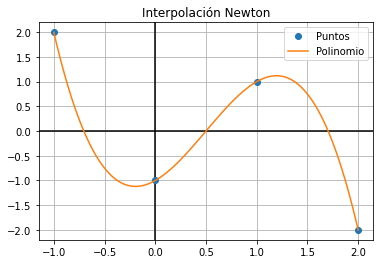

In [0]:
a = np.min(xa)
b = np.max(xa)
muestras = 101
xi_p = np.linspace(a,b,muestras)
fi_p = pxn(xi_p)

# Gráfica
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title('Interpolación Newton')
plt.plot(xa,ya,'o', label = 'Puntos')
plt.plot(xi_p,fi_p, label = 'Polinomio')
plt.legend()
plt.show()

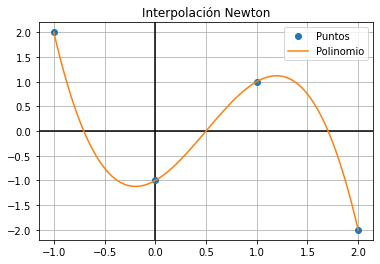

In [0]:
a = np.min(xa)
b = np.max(xa)
muestras = 101
xi_p = np.linspace(a,b,muestras)
fi_p = evalPoly(c,xa,xi_p)

# Gráfica
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title('Interpolación Newton')
plt.plot(xa,ya,'o', label = 'Puntos')
plt.plot(xi_p,fi_p, label = 'Polinomio')
plt.legend()
plt.show()

In [0]:
-1,0,1,2] e y = [3,-4,5,-6] 

In [0]:
xa= np.array([-1,0,1,2])
ya= np.array([3,-4,5,-6])
c = newton_dif_div(xa,ya)

Mariz de diferencias divididas

[[  3.   0.   0.   0.]
 [ -4.  -7.   0.   0.]
 [  5.   9.   8.   0.]
 [ -6. -11. -10.  -6.]] 

Vector de coeficientes

[ 3. -7.  8. -6.] 

El polinomio es:
p(x)=+3.0000-7.0000(x+1.0000)+8.0000(x+1.0000)(x+0.0000)-6.0000(x+1.0000)(x+0.0000)(x-1.0000)


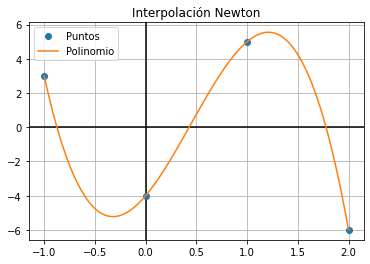

In [0]:
a = np.min(xa)
b = np.max(xa)
muestras = 101
xi_p = np.linspace(a,b,muestras)
fi_p = evalPoly(c,xa,xi_p)

# Gráfica
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title('Interpolación Newton')
plt.plot(xa,ya,'o', label = 'Puntos')
plt.plot(xi_p,fi_p, label = 'Polinomio')
plt.legend()
plt.show()


Ejercicio 4.- El tiempo más rápido jamás registrado en el Derby de Kentucky fue de un caballo llamado Secretariat en 1973, el caballo cubrió la pista de 1,25 millas en en 1:59(2/5) (1 minuto, 59.4 seg). Los tiempos para las marcas de cuarto de milla, media milla y una milla fueron: 0:25(1/5), 0:49(1/5) y 1:36(2/5):

a. Use la interpolación de Newton para predecir el tiempo en la marca de tres cuartos de milla y compárelo con el tiempo real de 1:13. Graficar el polinomio encontrado
b. Use la derivada del polinomio de interpolación para calcular la velocidad de Secretariat al final de la carrera.


In [0]:
xa= np.array([0.25,0.5,1,1.25])
ya= np.array([25.2,49.2,96.4,119.4])
c = newton_dif_div(xa,ya)

Mariz de diferencias divididas

[[ 25.2          0.           0.           0.        ]
 [ 49.2         96.           0.           0.        ]
 [ 96.4         94.4         -2.13333333   0.        ]
 [119.4         92.          -3.2         -1.06666667]] 

Vector de coeficientes

[25.2        96.         -2.13333333 -1.06666667] 

El polinomio es:
p(x)=+25.2000+96.0000(x-0.2500)-2.1333(x-0.2500)(x-0.5000)-1.0667(x-0.2500)(x-0.5000)(x-1.0000)


In [0]:
from sympy import *
x = symbols('x')
simplify(+25.2000+96.0000*(x-0.2500)-2.1333*(x-0.2500)*(x-0.5000)-1.0667*(x-0.2500)*(x-0.5000)*(x-1.0000))


-1.0667*x**3 - 0.266575*x**2 + 96.6666125*x + 1.066675

In [0]:
eval = evalPoly(c,xa,0.75)
eval

72.96666666666667

In [0]:
x =73-72.96666666666667
x

0.03333333333333144

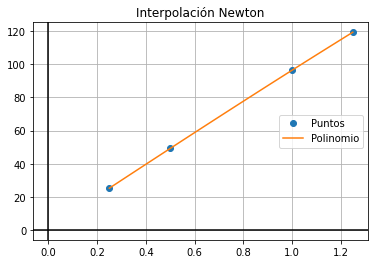

In [0]:
a = np.min(xa)
b = np.max(xa)
muestras = 101
xi_p = np.linspace(a,b,muestras)
fi_p = evalPoly(c,xa,xi_p)

# Gráfica
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.title('Interpolación Newton')
plt.plot(xa,ya,'o', label = 'Puntos')
plt.plot(xi_p,fi_p, label = 'Polinomio')
plt.legend()
plt.show()